$\Large{\text{Linear Regression with Regularizers Using Scikit-learn}}$

$\large{\text{Example using autompg data}}$


In this session, we shall learn about linear regression when we impose regularizers on the parameters.

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers.

In [ ]:
#First, we import the required packages
import pandas as pd                     #the pandas library is useful for data processing
import matplotlib.pyplot as plt         #the matplotlib library is useful for plotting purposes
import numpy as np
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. The data set we will consider represents miles per gallon for different car models as a response variable dependent on multiple attributes.


In [ ]:
#Let us explore the data and the description
#Get the data from the web
auto_mpg_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data
auto_mpg_data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
#if you wish to print the entire data, then use the following
auto_mpg_data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


What do the numbers in the above data mean? Let us understand the data by seeing its description.

In [ ]:
import urllib.request  #this package is useful for accessing text files over internet
auto_mpg_file = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names')


for line in auto_mpg_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line)

1. Title: Auto-Mpg Data



2. Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is

                maintained at Carnegie Mellon University. The dataset was 

                used in the 1983 American Statistical Association Exposition.

   (c) Date: July 7, 1993



3. Past Usage:

    -  See 2b (above)

    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.

       In Proceedings on the Tenth International Conference of Machine 

       Learning, 236-243, University of Massachusetts, Amherst. Morgan

       Kaufmann.



4. Relevant Information:



   This dataset is a slightly modified version of the dataset provided in

   the StatLib library.  In line with the use by Ross Quinlan (1993) in

   predicting the attribute "mpg", 8 of the original instances were removed 

   because they had unknown values for the "mpg" attribute.  The original 

   dataset is available in the file "auto-mpg.data-original".



   "The data concerns cit

Having known the data description, let us insert the descriptions into the data now.

In [ ]:
auto_mpg_data.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration','model year','origin','car-name']


#check by printing the data again
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
print("############################################")
print("          Info Of the Data Set")
print("############################################")
auto_mpg_data.info()
auto_mpg_data['horsepower']

############################################
          Info Of the Data Set
############################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car-name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object

*  We could see that the features and its data type, along with non-Null values.

* **Horsepower** and **car-name** features are of type **objects** in the given data set. Hence we have to take care of during the modelling.

In [ ]:
auto_mpg_data.describe(include=object)

,horsepower,car-name
count,398,398
unique,94,305
top,150.0,ford pinto
freq,22,6


In [ ]:
auto_mpg_data[auto_mpg_data['horsepower'].str.isnumeric()==False] #The code filters the DataFrame to select rows where the value in the 'horsepower' column cannot be converted to a number using the str.isnumeric() #print value those are not numeric(0-9)
# auto_mpg_data = auto_mpg_data.astype(float)
auto_mpg_data = auto_mpg_data.replace('?',np.nan)
auto_mpg_data = auto_mpg_data.dropna()
auto_mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# Remove Car name column in given dataset
auto_mpg_data = auto_mpg_data.drop(['model year', 'origin','car-name'], axis = 1) #dropping the columns 'car-name', 'model year' and 'origin' as we don't need them

auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


<ipython-input-40-a40279f8f996>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(auto_mpg_data.corr(),cmap=plt.cm.Reds,annot=True)


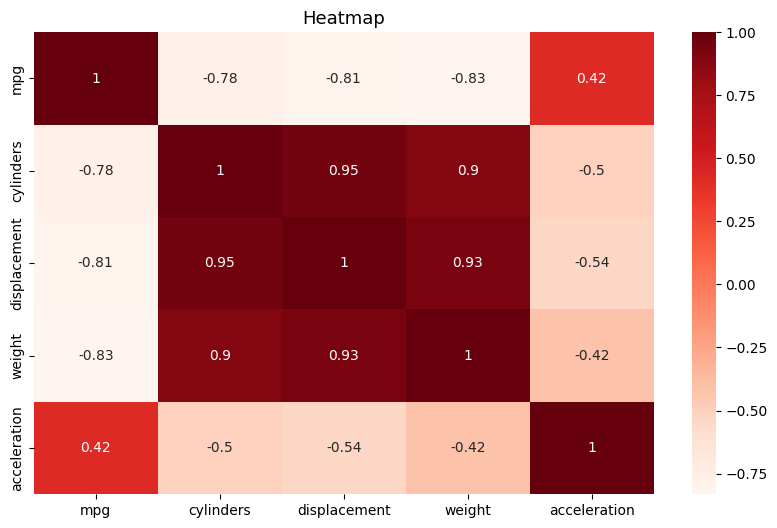

In [ ]:
#Heatmap displaying the relationship between the features of the data
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(auto_mpg_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',fontsize=13)
plt.show()

There is a strong NEGATIVE correlation between mpg and below features

*  Displacement
*  Weight
*  Cylinders

So, if those variables increases, the mpg will decrease.

In [ ]:
#Let us now number of data
n = len(auto_mpg_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 392


In [ ]:
#extract the predictor variable columns
cols = list(np.arange(1,6))
X_data = auto_mpg_data[auto_mpg_data.columns[cols]]

X_data

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6
394,4,97.0,52.00,2130.0,24.6
395,4,135.0,84.00,2295.0,11.6
396,4,120.0,79.00,2625.0,18.6


In [ ]:
# DataFrame on response variable columns
response_cols = [0]
y_data = auto_mpg_data[auto_mpg_data.columns[response_cols]]
y_data

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


# Data Splitting

In [ ]:
# Split Dataset into train and test dataset using sklearn
from sklearn.model_selection import train_test_split
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2000)
print(len(X_train_initial), len(X_test), len(y_train_initial), len(y_test))

313 79 313 79


In [ ]:
# Split Dataset into train and Validation dataset using sklearn
X_train, X_val, y_train, y_val = train_test_split(X_train_initial, y_train_initial, test_size=0.2, random_state=2000)
print(len(X_train), len(X_val), len(y_train), len(y_val))

250 63 250 63


# **Implementation of unregularised Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regression_model.intercept_)

[46.494211]


In [ ]:
for i,col in enumerate(X_train_initial.columns):
  print ("The coefficient for {} is {}:".format(col,regression_model.coef_[0][i]))

The coefficient for cylinders is 0.13003759023024603:
The coefficient for displacement is -0.022807869392802296:
The coefficient for horsepower is -0.047675270465712426:
The coefficient for weight is -0.0037387043849417684:
The coefficient for acceleration is -0.20840286877139305:


In [ ]:
y_pred=regression_model.predict(X_test)
print('R^2 of Linear regression on test set: {:.2f}'.format(regression_model.score(X_test, y_test)))

R^2 of Linear regression on test set: 0.67


# **Implement Ridge ($l_2$) Regression**

In [ ]:
# impoet linear Regression with L2 Regularization from Sklearn
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score # Returns an array of of scores for each fold of cv
from sklearn.model_selection import cross_validate # Return additional info (i.e training time)
from sklearn.model_selection import validation_curve # Shows how the performance of model varies with changes in its para

In [ ]:
# Implement Ridge Regression
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10]

#let us create our custom (train,val) splits from indices of X_train_initial and y_train_iniital
train_scores, val_scores = validation_curve(Ridge(tol=1e-10), X_train_initial, y_train_initial, param_name="alpha", param_range=alphas,cv=5) # Specifing the Ridge regression model with a very small tolerance value to ensure precise convergence during training.

print('train R^2 scores:',train_scores)
print('val R^2 scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(alphas)):
  print('alpha:', alphas[i])
  print('train R^2 scores:', train_scores[i])
  print('val R^2 scores:', val_scores[i])
  print('**************************')

train R^2 scores: [[0.7187495  0.72243314 0.71019993 0.70708892 0.71044051]
 [0.7187495  0.72243314 0.71019993 0.70708892 0.71044051]
 [0.7187495  0.72243314 0.71019993 0.70708892 0.71044051]
 [0.7187495  0.72243314 0.71019993 0.70708892 0.71044051]
 [0.71874949 0.72243314 0.71019993 0.70708892 0.71044051]
 [0.71874928 0.72243299 0.71019993 0.70708889 0.7104405 ]
 [0.71873295 0.72242149 0.71019947 0.70708609 0.71044031]
 [0.71838793 0.72214972 0.71017554 0.70702693 0.71043403]
 [0.71762342 0.72048763 0.70974746 0.70680261 0.71035442]
 [0.71696568 0.71805694 0.70905807 0.70640142 0.71012831]
 [0.70545946 0.70924174 0.69894001 0.69517173 0.70266216]
 [0.69862957 0.70414972 0.69134847 0.68948519 0.69828247]
 [0.61343178 0.62032434 0.60278859 0.60447655 0.61607465]
 [0.20122405 0.20548478 0.19331081 0.19709553 0.20501204]
 [0.02515771 0.02577608 0.0239863  0.02459126 0.02575723]]
val R^2 scores: [[0.68441419 0.65530987 0.69774795 0.72820037 0.71023037]
 [0.6844142  0.65530988 0.69774795 0.

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train R^2 scores :',avg_train_scores)
print('average val R^2 scores :',avg_val_scores)

average train R^2 scores : [0.7137824  0.7137824  0.7137824  0.7137824  0.7137824  0.71378232
 0.71377606 0.71363483 0.71300311 0.71212209 0.70229502 0.69637908
 0.61141918 0.20042544 0.02505372]
average val R^2 scores : [0.69518055 0.69518055 0.69518059 0.69518093 0.69518431 0.69521767
 0.69550943 0.69684744 0.69902473 0.70036176 0.69715403 0.69223188
 0.60906048 0.19703199 0.02046474]


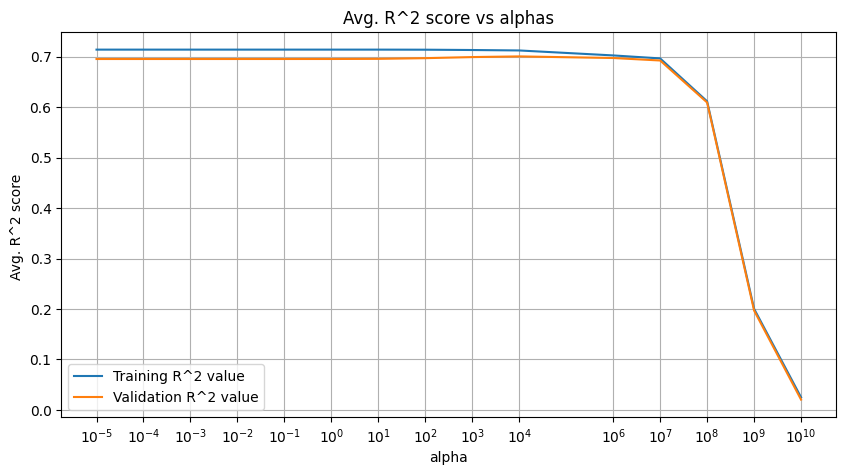

In [ ]:
plt.figure(figsize =(10,5))

plt.plot(alphas,avg_train_scores,label = "Training R^2 value")
plt.plot(alphas, avg_val_scores,label = "Validation R^2 value")
plt.xlabel('alpha')
plt.ylabel('Avg. R^2 score ')
plt.title("Avg. R^2 score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
#best alpha

best_alpha = alphas[np.argmax(avg_val_scores)]
print('best alpha from 5 fold CV:',best_alpha)

best alpha from 5 fold CV: 10000


**Taking best alpha**

# Evaluating the performance on test data

---



In [ ]:
#Fit and finding the coefficient.
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_initial,y_train_initial)
for i,col in enumerate(X_train_initial.columns):
  print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))
pred_test = ridge.predict(X_test)   # predict value
print("test R^2 score = ",ridge.score(X_test, y_test))
print("mse_score = ",mean_squared_error(y_test, pred_test),"\n")

Ridge model coefficients for cylinders is -0.0012904613423743317:
Ridge model coefficients for displacement is -0.008723735680513014:
Ridge model coefficients for horsepower is -0.03660925544371209:
Ridge model coefficients for weight is -0.005249431986507121:
Ridge model coefficients for acceleration is -0.008845312515812578:
test R^2 score =  0.6853441755834895
mse_score =  18.70688923438141 



# **Implement Lasso ($l_1$) Regression**

In [ ]:
from sklearn.linear_model import Lasso,LassoCV
# Implement lasso Regression
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10]

#let us create our custom (train,val) splits from indices of X_train_initial and y_train_iniital
train_scores, val_scores = validation_curve(Lasso(tol=1e-10), X_train_initial, y_train_initial, param_name="alpha", param_range=alphas,cv=5)

print('train R^2 scores:',train_scores)
print('val R^2 scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(alphas)):
  print('alpha:', alphas[i])
  print('train R^2 scores:', train_scores[i])
  print('val R^2 scores:', val_scores[i])
  print('**************************')

train R^2 scores: [[0.7187495  0.72243314 0.71019993 0.70708892 0.71044051]
 [0.7187495  0.72243314 0.71019993 0.70708892 0.71044051]
 [0.71874942 0.72243307 0.71019986 0.70708885 0.71044043]
 [0.71874233 0.72242631 0.7101922  0.70708184 0.71043336]
 [0.71803286 0.72177921 0.71011362 0.70687352 0.71036658]
 [0.71699589 0.71767359 0.70892483 0.70647528 0.71018731]
 [0.7131025  0.71349145 0.70579985 0.70251954 0.70621756]
 [0.6983755  0.70438677 0.69108406 0.68967069 0.69871762]
 [0.67512436 0.6830384  0.66698331 0.66731381 0.67760932]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
val R^2 scores: [[ 0.68441456  0.65531051  0.69774774  0.72820095  0.71022988]
 [ 0.68441788  0.6553163   0.697

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train R^2 scores :',avg_train_scores)
print('average val R^2 scores :',avg_val_scores)

average train R^2 scores : [0.7137824  0.7137824  0.71378233 0.71377521 0.71343316 0.71205138
 0.70822618 0.69644693 0.67401384 0.         0.         0.
 0.         0.         0.        ]
average val R^2 scores : [ 0.69518073  0.69518234  0.69519842  0.69534888  0.69700573  0.69991084
  0.69698362  0.69196571  0.67070077 -0.00477682 -0.00477682 -0.00477682
 -0.00477682 -0.00477682 -0.00477682]


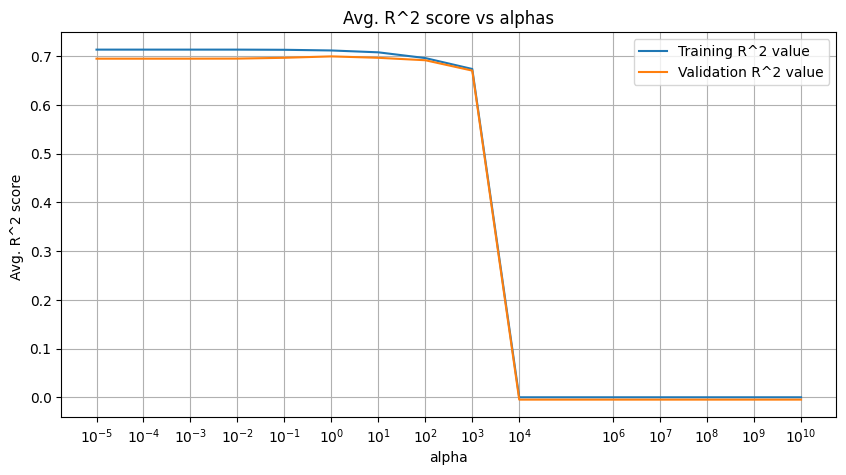

In [ ]:
plt.figure(figsize =(10,5))

plt.plot(alphas,avg_train_scores,label = "Training R^2 value")
plt.plot(alphas, avg_val_scores,label = "Validation R^2 value")
plt.xlabel('alpha')
plt.ylabel('Avg. R^2 score ')
plt.title("Avg. R^2 score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

In [ ]:
#best alpha

best_alpha = alphas[np.argmax(avg_val_scores)]
print('best alpha from 5 fold CV:',best_alpha)

best alpha from 5 fold CV: 1


# Evaluating the performance on test data

---

In [ ]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_initial,y_train_initial)
for i,col in enumerate(X_train_initial.columns):
  print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))
pred_test = lasso.predict(X_test)
print("test R^2 score = ",lasso.score(X_test, y_test))
print("mse_score = ",mean_squared_error(y_test, pred_test),"\n")

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.0:
Lasso model coefficients for weight is -0.0:
Lasso model coefficients for acceleration is 0.0:
test R^2 score =  -0.0173299479579494
mse_score =  60.48220682569311 

